In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/processed/bookings_Binnings_Handled.csv')
df.head()

,booking_date,appointment_date,appointment_time,task_id,num_documents,queue_number,satisfaction_rating,total_task_time_minutes,duration_minutes,duration_log
0,2021-01-01,2021-01-01,09:03,TASK-002,0,2,4,834.569483,37,3.637586
1,2021-01-01,2021-01-01,09:12,TASK-001,1,1,4,834.569483,60,4.110874
2,2021-01-01,2021-01-01,09:36,TASK-002,1,6,5,834.569483,57,4.060443
3,2021-01-01,2021-01-01,09:45,TASK-001,1,4,4,834.569483,53,3.988984
4,2021-01-01,2021-01-01,10:12,TASK-002,1,8,3,834.569483,88,4.488636


In [3]:
# Combine imputation and scaling in one step
imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()

# Impute and scale in sequence
df['total_task_time_minutes'] = scaler.fit_transform(
    imputer.fit_transform(df[['total_task_time_minutes']])
)

print(f"\nMissing values: {df['total_task_time_minutes'].isnull().sum()}")

df.head()


Missing values: 0


,booking_date,appointment_date,appointment_time,task_id,num_documents,queue_number,satisfaction_rating,total_task_time_minutes,duration_minutes,duration_log
0,2021-01-01,2021-01-01,09:03,TASK-002,0,2,4,-0.965102,37,3.637586
1,2021-01-01,2021-01-01,09:12,TASK-001,1,1,4,-0.965102,60,4.110874
2,2021-01-01,2021-01-01,09:36,TASK-002,1,6,5,-0.965102,57,4.060443
3,2021-01-01,2021-01-01,09:45,TASK-001,1,4,4,-0.965102,53,3.988984
4,2021-01-01,2021-01-01,10:12,TASK-002,1,8,3,-0.965102,88,4.488636


In [4]:
# Count values greater than 0
count_greater_than_0 = (df['total_task_time_minutes'] > 0).sum()
print(f"Values greater than 0: {count_greater_than_0}")

Values greater than 0: 79554


In [5]:
# Parse date and time
df['appointment_date_parsed'] = pd.to_datetime(df['appointment_date'], errors='coerce')

# Extract hour_of_day from time; robust to formats like HH:MM or HH:MM:SS
appt_time_parsed = pd.to_datetime(df['appointment_time'].astype(str), errors='coerce')
df['hour_of_day'] = appt_time_parsed.dt.hour

# Cyclical encoding for hour
df['hour_sin'] = np.sin(2 * np.pi * df['hour_of_day'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour_of_day'] / 24)

df.head()

/var/folders/lx/fj0jgh0s0rg95r58q33kw2b40000gn/T/ipykernel_40632/3652946082.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  appt_time_parsed = pd.to_datetime(df['appointment_time'].astype(str), errors='coerce')


,booking_date,appointment_date,appointment_time,task_id,num_documents,queue_number,satisfaction_rating,total_task_time_minutes,duration_minutes,duration_log,appointment_date_parsed,hour_of_day,hour_sin,hour_cos
0,2021-01-01,2021-01-01,09:03,TASK-002,0,2,4,-0.965102,37,3.637586,2021-01-01,9,0.707107,-0.707107
1,2021-01-01,2021-01-01,09:12,TASK-001,1,1,4,-0.965102,60,4.110874,2021-01-01,9,0.707107,-0.707107
2,2021-01-01,2021-01-01,09:36,TASK-002,1,6,5,-0.965102,57,4.060443,2021-01-01,9,0.707107,-0.707107
3,2021-01-01,2021-01-01,09:45,TASK-001,1,4,4,-0.965102,53,3.988984,2021-01-01,9,0.707107,-0.707107
4,2021-01-01,2021-01-01,10:12,TASK-002,1,8,3,-0.965102,88,4.488636,2021-01-01,10,0.500000,-0.866025


/var/folders/lx/fj0jgh0s0rg95r58q33kw2b40000gn/T/ipykernel_40632/3720736128.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot([df_analysis[df_analysis['doc_bins'] == label]['duration_minutes'].dropna()
/var/folders/lx/fj0jgh0s0rg95r58q33kw2b40000gn/T/ipykernel_40632/3720736128.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([df_analysis[df_analysis['queue_bins'] == label]['duration_minutes'].dropna()
/var/folders/lx/fj0jgh0s0rg95r58q33kw2b40000gn/T/ipykernel_40632/3720736128.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 2].boxplot([df_analysis[df_analysis['s

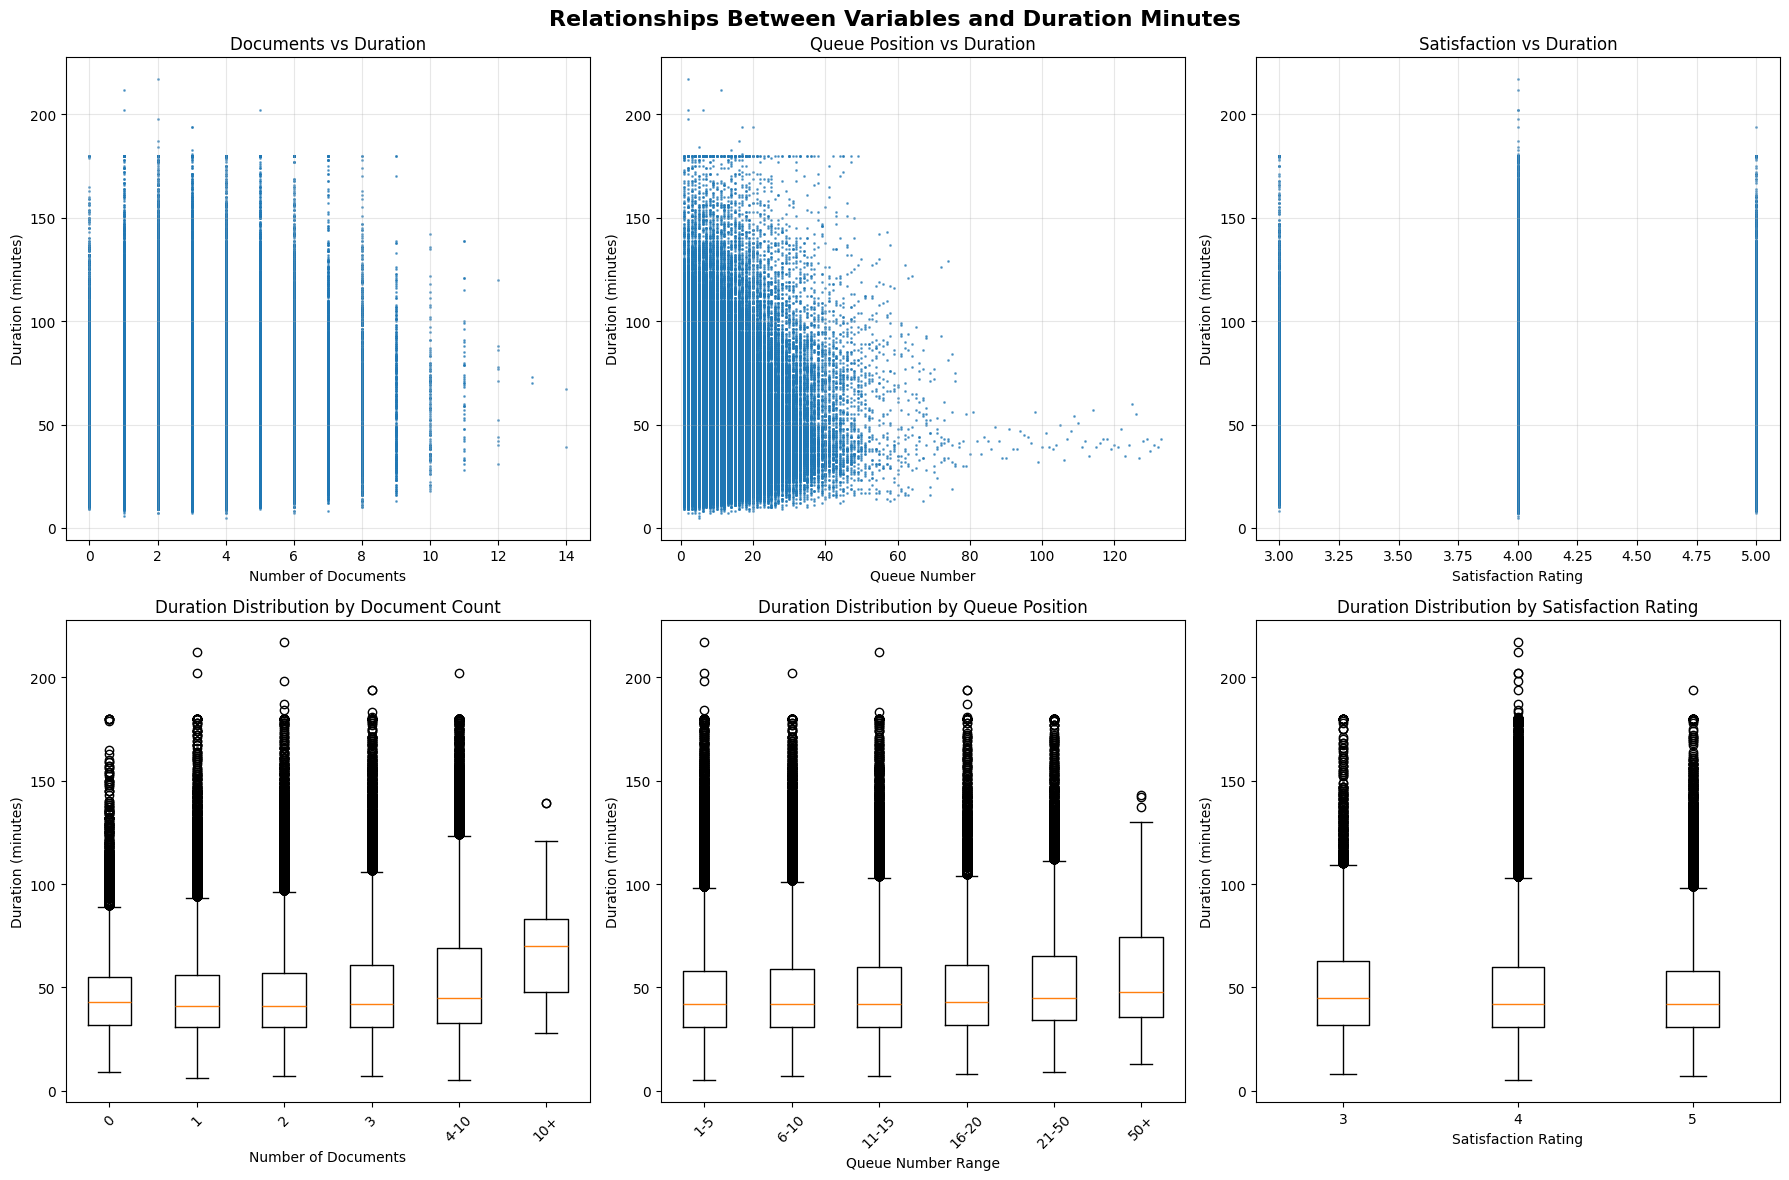


CORRELATION ANALYSIS


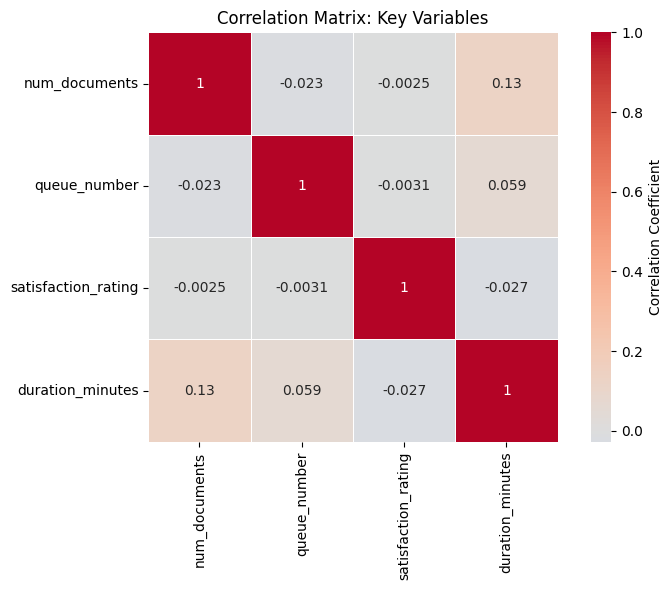

In [6]:
df_analysis = pd.read_csv('data/processed/bookings_Binnings_Handled.csv')

# Create comprehensive visualizations for relationships with duration_minutes
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Relationships Between Variables and Duration Minutes', fontsize=16, fontweight='bold')

# 1. Scatter plot: num_documents vs duration_minutes
axes[0, 0].scatter(df_analysis['num_documents'], df_analysis['duration_minutes'], alpha=0.6, s=1)
axes[0, 0].set_xlabel('Number of Documents')
axes[0, 0].set_ylabel('Duration (minutes)')
axes[0, 0].set_title('Documents vs Duration')
axes[0, 0].grid(True, alpha=0.3)

# 2. Scatter plot: queue_number vs duration_minutes
axes[0, 1].scatter(df_analysis['queue_number'], df_analysis['duration_minutes'], alpha=0.6, s=1)
axes[0, 1].set_xlabel('Queue Number')
axes[0, 1].set_ylabel('Duration (minutes)')
axes[0, 1].set_title('Queue Position vs Duration')
axes[0, 1].grid(True, alpha=0.3)

# 3. Scatter plot: satisfaction_rating vs duration_minutes
axes[0, 2].scatter(df_analysis['satisfaction_rating'], df_analysis['duration_minutes'], alpha=0.6, s=1)
axes[0, 2].set_xlabel('Satisfaction Rating')
axes[0, 2].set_ylabel('Duration (minutes)')
axes[0, 2].set_title('Satisfaction vs Duration')
axes[0, 2].grid(True, alpha=0.3)

# 4. Box plot: num_documents vs duration_minutes (grouped)
df_analysis['doc_bins'] = pd.cut(df_analysis['num_documents'], bins=[-1, 0, 1, 2, 3, 10, 50], 
                                 labels=['0', '1', '2', '3', '4-10', '10+'])
axes[1, 0].boxplot([df_analysis[df_analysis['doc_bins'] == label]['duration_minutes'].dropna() 
                     for label in df_analysis['doc_bins'].cat.categories], 
                    labels=df_analysis['doc_bins'].cat.categories)
axes[1, 0].set_xlabel('Number of Documents')
axes[1, 0].set_ylabel('Duration (minutes)')
axes[1, 0].set_title('Duration Distribution by Document Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Box plot: queue_number vs duration_minutes (grouped)
df_analysis['queue_bins'] = pd.cut(df_analysis['queue_number'], bins=[0, 5, 10, 15, 20, 50, 100], 
                                   labels=['1-5', '6-10', '11-15', '16-20', '21-50', '50+'])
axes[1, 1].boxplot([df_analysis[df_analysis['queue_bins'] == label]['duration_minutes'].dropna() 
                     for label in df_analysis['queue_bins'].cat.categories], 
                    labels=df_analysis['queue_bins'].cat.categories)
axes[1, 1].set_xlabel('Queue Number Range')
axes[1, 1].set_ylabel('Duration (minutes)')
axes[1, 1].set_title('Duration Distribution by Queue Position')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Box plot: satisfaction_rating vs duration_minutes
axes[1, 2].boxplot([df_analysis[df_analysis['satisfaction_rating'] == rating]['duration_minutes'].dropna() 
                     for rating in sorted(df_analysis['satisfaction_rating'].unique())], 
                    labels=sorted(df_analysis['satisfaction_rating'].unique()))
axes[1, 2].set_xlabel('Satisfaction Rating')
axes[1, 2].set_ylabel('Duration (minutes)')
axes[1, 2].set_title('Duration Distribution by Satisfaction Rating')

plt.tight_layout()
plt.show()

# Correlation matrix
print("\n" + "="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Calculate correlations
correlation_vars = ['num_documents', 'queue_number', 'satisfaction_rating', 'duration_minutes']
correlation_matrix = df_analysis[correlation_vars].corr()

# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix: Key Variables')
plt.tight_layout()
plt.show()

# Clean up temporary columns
df_analysis = df_analysis.drop(columns=['doc_bins', 'queue_bins'])

/var/folders/lx/fj0jgh0s0rg95r58q33kw2b40000gn/T/ipykernel_40632/495626059.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=agg, x='task_id', y='num_documents', palette='viridis')


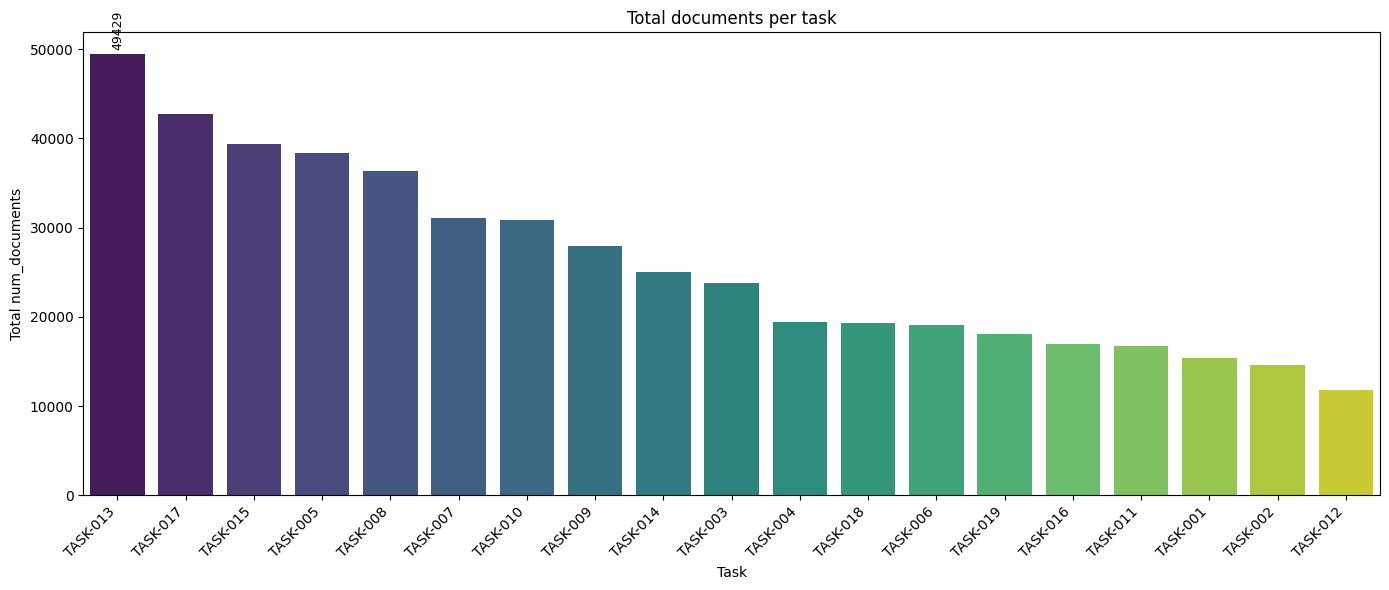

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use your working DataFrame (replace df if needed)
agg = (
    df.groupby('task_id', dropna=False)['num_documents']
      .sum()
      .reset_index()
      .sort_values('num_documents', ascending=False)
)

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=agg, x='task_id', y='num_documents', palette='viridis')
ax.set_title('Total documents per task')
ax.set_xlabel('Task')
ax.set_ylabel('Total num_documents')
plt.xticks(rotation=45, ha='right')

# Label bars with values
try:
    ax.bar_label(ax.containers[0], fmt='%.0f', padding=3, fontsize=9, rotation=90)
except Exception:
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height()):,}",
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=9, rotation=90)

plt.tight_layout()
plt.show()

In [8]:
unique_per_task = (
    df[['task_id', 'num_documents']]
      .drop_duplicates()
      .sort_values(['task_id', 'num_documents'])
      .groupby('task_id')['num_documents']
      .apply(lambda s: sorted(s.unique().tolist()))
)

# Print nicely
for task, vals in unique_per_task.items():
    print(f"{task}: {vals}")

TASK-001: [0, 1, 2, 3, 4, 5, 6, 7]
TASK-002: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
TASK-003: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
TASK-004: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
TASK-005: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
TASK-006: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
TASK-007: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
TASK-008: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
TASK-009: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
TASK-010: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
TASK-011: [0, 1, 2, 3, 4, 5, 6, 7, 8]
TASK-012: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
TASK-013: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
TASK-014: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
TASK-015: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
TASK-016: [0, 1, 2, 3, 4, 5, 6, 8]
TASK-017: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
TASK-018: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
TASK-019: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [9]:
# 0=Monday ... 6=Sunday
df['day_of_week'] = df['appointment_date_parsed'].dt.dayofweek

# Ensure all 5 categories appear as columns even if absent in data
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=list(range(5)))
dow_dummies = pd.get_dummies(df['day_of_week'], prefix='dow', dtype=int)

# Attach to df
df = pd.concat([df, dow_dummies], axis=1)

df.drop(columns=["day_of_week", "hour_of_day"], inplace=True)

df.head()

,booking_date,appointment_date,appointment_time,task_id,num_documents,queue_number,satisfaction_rating,total_task_time_minutes,duration_minutes,duration_log,appointment_date_parsed,hour_sin,hour_cos,dow_0,dow_1,dow_2,dow_3,dow_4
0,2021-01-01,2021-01-01,09:03,TASK-002,0,2,4,-0.965102,37,3.637586,2021-01-01,0.707107,-0.707107,0,0,0,0,1
1,2021-01-01,2021-01-01,09:12,TASK-001,1,1,4,-0.965102,60,4.110874,2021-01-01,0.707107,-0.707107,0,0,0,0,1
2,2021-01-01,2021-01-01,09:36,TASK-002,1,6,5,-0.965102,57,4.060443,2021-01-01,0.707107,-0.707107,0,0,0,0,1
3,2021-01-01,2021-01-01,09:45,TASK-001,1,4,4,-0.965102,53,3.988984,2021-01-01,0.707107,-0.707107,0,0,0,0,1
4,2021-01-01,2021-01-01,10:12,TASK-002,1,8,3,-0.965102,88,4.488636,2021-01-01,0.500000,-0.866025,0,0,0,0,1


In [10]:
df['month'] = df['appointment_date_parsed'].dt.month

# Ensure all 12 months appear
df['month'] = pd.Categorical(df['month'], categories=list(range(1, 13)))
month_dummies = pd.get_dummies(df['month'], prefix='month', dtype=int)

# Attach to df
df = pd.concat([df, month_dummies], axis=1)

df.head()

,booking_date,appointment_date,appointment_time,task_id,num_documents,queue_number,satisfaction_rating,total_task_time_minutes,duration_minutes,duration_log,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2021-01-01,2021-01-01,09:03,TASK-002,0,2,4,-0.965102,37,3.637586,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-01,2021-01-01,09:12,TASK-001,1,1,4,-0.965102,60,4.110874,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-01,2021-01-01,09:36,TASK-002,1,6,5,-0.965102,57,4.060443,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-01,2021-01-01,09:45,TASK-001,1,4,4,-0.965102,53,3.988984,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,2021-01-01,10:12,TASK-002,1,8,3,-0.965102,88,4.488636,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Extract day of month from appointment_date
df['day_of_month'] = df['appointment_date_parsed'].dt.day

# Cyclical encoding for day of month (1-31)
df['day_of_month_sin'] = np.sin(2 * np.pi * df['day_of_month'] / 31)
df['day_of_month_cos'] = np.cos(2 * np.pi * df['day_of_month'] / 31)

# Binning approach for business logic
# Group days into meaningful categories
# df['day_category'] = pd.cut(df['day_of_month'], 
#                            bins=[0, 10, 20, 31], 
#                            labels=['early_month', 'mid_month', 'late_month'],
#                            include_lowest=True)

# One-hot encode the day category
# day_category_dummies = pd.get_dummies(df['day_category'], prefix='day_cat', dtype=int)
# df = pd.concat([df, day_category_dummies], axis=1)

# Show the new columns
print("New day-related columns:")
print(df[['day_of_month', 'day_of_month_sin', 'day_of_month_cos']])

df.drop(columns=['day_of_month'], inplace=True)

New day-related columns:
        day_of_month  day_of_month_sin  day_of_month_cos
0                  1      2.012985e-01           0.97953
1                  1      2.012985e-01           0.97953
2                  1      2.012985e-01           0.97953
3                  1      2.012985e-01           0.97953
4                  1      2.012985e-01           0.97953
...              ...               ...               ...
203688            31     -2.449294e-16           1.00000
203689            31     -2.449294e-16           1.00000
203690            31     -2.449294e-16           1.00000
203691            31     -2.449294e-16           1.00000
203692            31     -2.449294e-16           1.00000

[203693 rows x 3 columns]


In [12]:
df.drop(columns=['appointment_date_parsed'], inplace=True)

# Show final result
df.head()

,booking_date,appointment_date,appointment_time,task_id,num_documents,queue_number,satisfaction_rating,total_task_time_minutes,duration_minutes,duration_log,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_of_month_sin,day_of_month_cos
0,2021-01-01,2021-01-01,09:03,TASK-002,0,2,4,-0.965102,37,3.637586,...,0,0,0,0,0,0,0,0,0.201299,0.97953
1,2021-01-01,2021-01-01,09:12,TASK-001,1,1,4,-0.965102,60,4.110874,...,0,0,0,0,0,0,0,0,0.201299,0.97953
2,2021-01-01,2021-01-01,09:36,TASK-002,1,6,5,-0.965102,57,4.060443,...,0,0,0,0,0,0,0,0,0.201299,0.97953
3,2021-01-01,2021-01-01,09:45,TASK-001,1,4,4,-0.965102,53,3.988984,...,0,0,0,0,0,0,0,0,0.201299,0.97953
4,2021-01-01,2021-01-01,10:12,TASK-002,1,8,3,-0.965102,88,4.488636,...,0,0,0,0,0,0,0,0,0.201299,0.97953


In [13]:
# Ensure appointment_date is datetime
df['appointment_date_parsed'] = pd.to_datetime(df['appointment_date'], errors='coerce')

# Filter to the requested years
df_ym = df[df['appointment_date_parsed'].dt.year.between(2021, 2024)].copy()

# Derive year, month number, and month name
df_ym['year'] = df_ym['appointment_date_parsed'].dt.year
df_ym['month_num'] = df_ym['appointment_date_parsed'].dt.month
df_ym['month'] = df_ym['appointment_date_parsed'].dt.month_name()

In [14]:
monthly_counts = (
	df_ym.groupby(['year', 'month_num', 'month'])
	.size()
	.reset_index(name='appointments')
)

# Order months Jan..Dec
month_order = list(range(1, 13))
monthly_counts = monthly_counts.sort_values(['year', 'month_num'])
monthly_counts.head()

,year,month_num,month,appointments
0,2021,1,January,4180
1,2021,2,February,3450
2,2021,3,March,4475
3,2021,4,April,3460
4,2021,5,May,3625


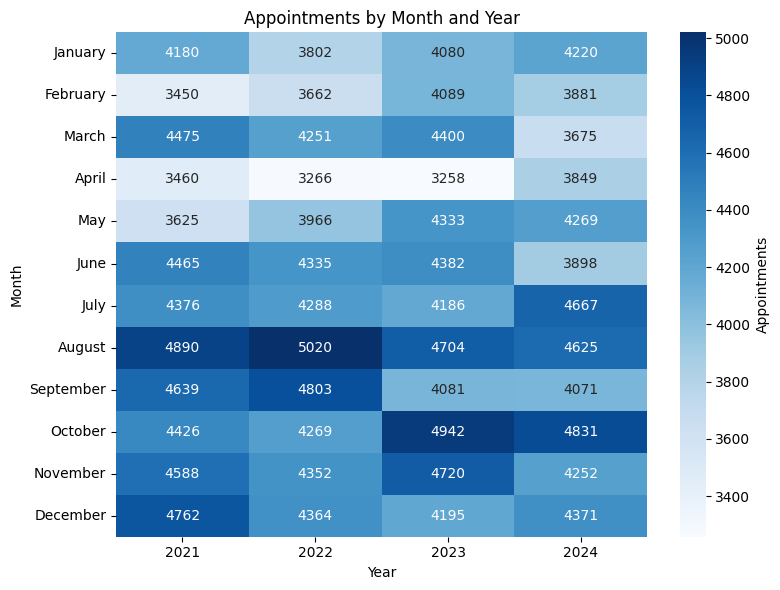

In [15]:
# Pivot to month x year
heatmap_df = monthly_counts.pivot(index='month', columns='year', values='appointments')

# Reindex rows to calendar order Jan..Dec
month_names_ordered = pd.date_range('2021-01-01', periods=12, freq='MS').month_name().tolist()
heatmap_df = heatmap_df.reindex(month_names_ordered)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_df, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Appointments'})
plt.title('Appointments by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

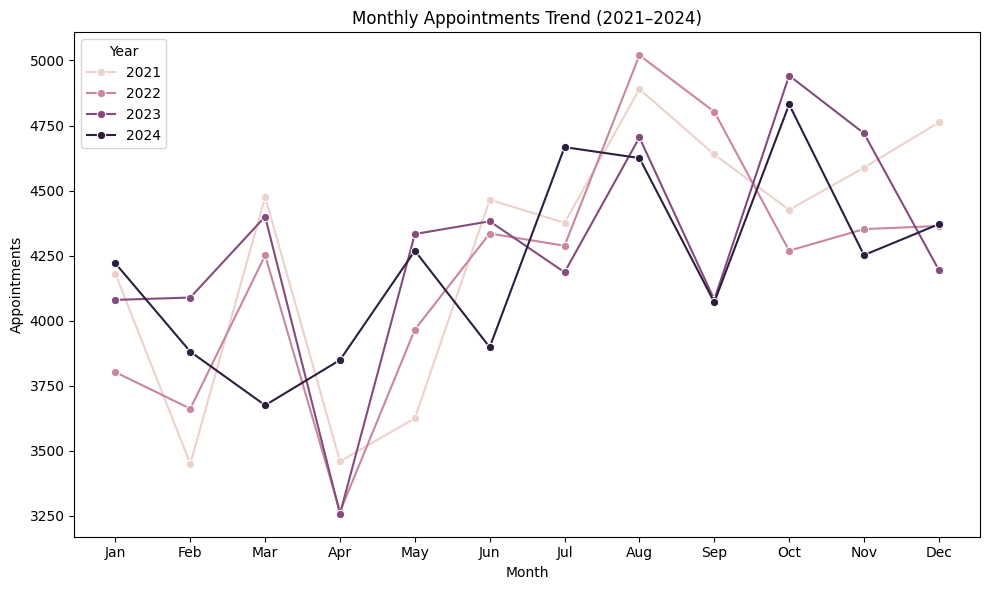

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(
	data=monthly_counts,
	x='month_num', y='appointments',
	hue='year', marker='o'
)
plt.xticks(ticks=range(1, 13), labels=pd.date_range('2021-01-01', periods=12, freq='MS').strftime('%b'))
plt.title('Monthly Appointments Trend (2021–2024)')
plt.xlabel('Month')
plt.ylabel('Appointments')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

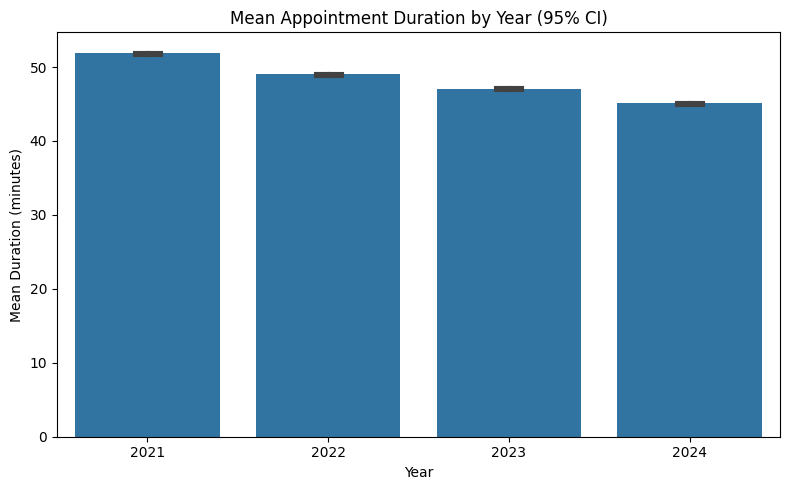

In [17]:
df['year'] = df['appointment_date_parsed'].dt.year

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='year', y='duration_minutes', estimator='mean', errorbar='ci', capsize=.15)
plt.title('Mean Appointment Duration by Year (95% CI)')
plt.xlabel('Year')
plt.ylabel('Mean Duration (minutes)')
plt.tight_layout()
plt.show()

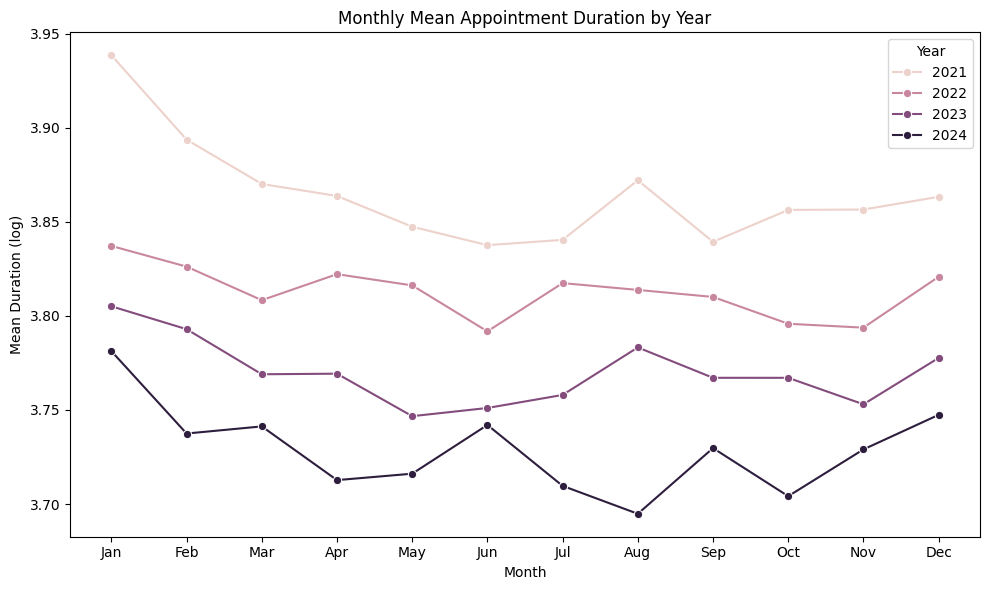

In [18]:
tmp = df.copy()
tmp['month_num'] = tmp['appointment_date_parsed'].dt.month
monthly_means = (tmp.groupby(['year','month_num'])['duration_log']
                   .mean()
                   .reset_index())

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_means, x='month_num', y='duration_log', hue='year', marker='o')
plt.xticks(ticks=range(1,13), labels=pd.date_range('2000-01-01', periods=12, freq='MS').strftime('%b'))
plt.title('Monthly Mean Appointment Duration by Year')
plt.xlabel('Month')
plt.ylabel('Mean Duration (log)')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [19]:
# One-hot encode year with fixed categories
df['year'] = pd.Categorical(df['year'], categories=[2021, 2022, 2023, 2024])
year_dummies = pd.get_dummies(df['year'], prefix='year', dtype=int)

# Attach and (optionally) drop the original year column
df = pd.concat([df, year_dummies], axis=1)
df.drop(columns=['year'], inplace=True)  # uncomment if you don’t want the numeric year

# Quick check of new columns
df.filter(regex=r'^year_').head()

,year_2021,year_2022,year_2023,year_2024
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [20]:
# Ensure task_id is string and handle missing values
df['task_id'] = df['task_id'].astype('string')

# Fix categories for stable columns
task_categories = sorted(df['task_id'].unique())
df['task_id'] = pd.Categorical(df['task_id'], categories=task_categories)

# One-hot encode
task_dummies = pd.get_dummies(df['task_id'], prefix='task', dtype=int)
df = pd.concat([df, task_dummies], axis=1)

# Quick check
df.filter(regex=r'^task_').head()

,task_id,task_TASK-001,task_TASK-002,task_TASK-003,task_TASK-004,task_TASK-005,task_TASK-006,task_TASK-007,task_TASK-008,task_TASK-009,task_TASK-010,task_TASK-011,task_TASK-012,task_TASK-013,task_TASK-014,task_TASK-015,task_TASK-016,task_TASK-017,task_TASK-018,task_TASK-019
0,TASK-002,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TASK-001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TASK-002,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TASK-001,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TASK-002,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df_encoded= df.drop(columns=["task_id", "booking_date", "appointment_date_parsed"])
df_encoded.head()

,appointment_date,appointment_time,num_documents,queue_number,satisfaction_rating,total_task_time_minutes,duration_minutes,duration_log,hour_sin,hour_cos,...,task_TASK-010,task_TASK-011,task_TASK-012,task_TASK-013,task_TASK-014,task_TASK-015,task_TASK-016,task_TASK-017,task_TASK-018,task_TASK-019
0,2021-01-01,09:03,0,2,4,-0.965102,37,3.637586,0.707107,-0.707107,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-01,09:12,1,1,4,-0.965102,60,4.110874,0.707107,-0.707107,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-01,09:36,1,6,5,-0.965102,57,4.060443,0.707107,-0.707107,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-01,09:45,1,4,4,-0.965102,53,3.988984,0.707107,-0.707107,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,10:12,1,8,3,-0.965102,88,4.488636,0.500000,-0.866025,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_encoded.to_csv('data/processed/bookings_Encoded.csv', index=False)
df_encoded.head()

,appointment_date,appointment_time,num_documents,queue_number,satisfaction_rating,total_task_time_minutes,duration_minutes,duration_log,hour_sin,hour_cos,...,task_TASK-010,task_TASK-011,task_TASK-012,task_TASK-013,task_TASK-014,task_TASK-015,task_TASK-016,task_TASK-017,task_TASK-018,task_TASK-019
0,2021-01-01,09:03,0,2,4,-0.965102,37,3.637586,0.707107,-0.707107,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-01,09:12,1,1,4,-0.965102,60,4.110874,0.707107,-0.707107,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-01,09:36,1,6,5,-0.965102,57,4.060443,0.707107,-0.707107,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-01,09:45,1,4,4,-0.965102,53,3.988984,0.707107,-0.707107,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,10:12,1,8,3,-0.965102,88,4.488636,0.500000,-0.866025,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_preprocessed= df_encoded.drop(columns=["num_documents", "queue_number", "satisfaction_rating", "duration_minutes", "month"])

df_preprocessed.to_csv('data/processed/bookings_PreProcessed.csv', index=False)
df_preprocessed.head()

,appointment_date,appointment_time,total_task_time_minutes,duration_log,hour_sin,hour_cos,dow_0,dow_1,dow_2,dow_3,...,task_TASK-010,task_TASK-011,task_TASK-012,task_TASK-013,task_TASK-014,task_TASK-015,task_TASK-016,task_TASK-017,task_TASK-018,task_TASK-019
0,2021-01-01,09:03,-0.965102,3.637586,0.707107,-0.707107,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-01,09:12,-0.965102,4.110874,0.707107,-0.707107,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-01,09:36,-0.965102,4.060443,0.707107,-0.707107,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-01,09:45,-0.965102,3.988984,0.707107,-0.707107,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,10:12,-0.965102,4.488636,0.500000,-0.866025,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
